<a href="https://colab.research.google.com/github/Simi0021/DAP/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **코로나 바이러스 감염증 현황**

확진자, 사망자, 백신접종 현황을 다양하게 표현해보았다.

202014385임지은

- 데이터 자료 출처: http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=13&ncvContSeq=&contSeq=&board_id=&gubun=
- 마지막 데이터 확정 시간: 2021.12.17 오전 10:30

   (코로나 확진자수는 매일 변하므로 마지막으로 측정하여 올린 시간을 표기해 두었습니다.)

+ 웹크롤링을 통해 사이트에 나와있는 데이터를 csv파일로 가져온 상태입니다.

- 웹크롤링/스크래핑 강의 유튜브 참조: https://www.youtube.com/watch?v=yQ20jZwDjTE&t=2379s

In [3]:
import pandas as pd
import numpy as np
from google.colab import files

data = files.upload()

Saving 코로나바이러스 시도별 발생동향.CSV to 코로나바이러스 시도별 발생동향 (3).CSV


# **- 데이터를 보여준다.**

In [4]:
# head로 데이터 미리 보기
df = pd.read_csv('코로나바이러스 시도별 발생동향.CSV', encoding='cp949')
df.head()

,시도명,합계,국내발생,해외유입,확진환자,격리해제,사망자,발생률(*)
0,합계,5318,5258,60,570414,456126,4776,1101
1,서울,1908,1895,13,203255,153488,1521,2102
2,부산,365,364,1,21526,17097,229,635
3,대구,111,110,1,21645,19610,346,895
4,인천,375,371,4,32862,26331,218,1117


# **- 데이터 타입을 보여준다.**

크롤링한 데이터가 한글은 object형식, 숫자는 int64형식으로 잘 나온것을 볼 수 있다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     18 non-null     object
 1   합계      18 non-null     int64 
 2   국내발생    18 non-null     int64 
 3   해외유입    18 non-null     int64 
 4   확진환자    18 non-null     int64 
 5   격리해제    18 non-null     int64 
 6   사망자     18 non-null     int64 
 7   발생률(*)  18 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ KB


# **- 결측 데이터 확인**

데이터에 결측값 없이 모두 값이 차있는 것을 볼 수 있다.

In [6]:
df.isnull().sum()

시도명       0
합계        0
국내발생      0
해외유입      0
확진환자      0
격리해제      0
사망자       0
발생률(*)    0
dtype: int64

# **- 행/열에 있는 '합계' 지우기**

그래프 그리는 데에 필요없는 값을 데이터에서 지웠습니다.

In [7]:
# 지우기
df = df.drop(['합계'], axis=1)
df.head()

,시도명,국내발생,해외유입,확진환자,격리해제,사망자,발생률(*)
0,합계,5258,60,570414,456126,4776,1101
1,서울,1895,13,203255,153488,1521,2102
2,부산,364,1,21526,17097,229,635
3,대구,110,1,21645,19610,346,895
4,인천,371,4,32862,26331,218,1117


In [8]:
# 지우기
df = df.drop(0)
df.head()

,시도명,국내발생,해외유입,확진환자,격리해제,사망자,발생률(*)
1,서울,1895,13,203255,153488,1521,2102
2,부산,364,1,21526,17097,229,635
3,대구,110,1,21645,19610,346,895
4,인천,371,4,32862,26331,218,1117
5,광주,52,0,7182,6650,35,495


# **- 폰트 바꾸기**
레퍼런스: https://pinkwink.kr/1255

데이터가 한글로 되어있을 경우 한글 인식이 안되어 네모(□)로 보이므로 글씨체를 따로 지정해줘야 한다.

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


# **- 시도별 코로나 확진 발생률**


가져온 df 중 '발생률(*)'부분과 '시도명' 부분을 가져와 파이차트로 그렸습니다.

결과를 보아 서울이 코로나 확진 발생률이 가장 높다는 것을 한눈에 알 수 있습니다.

colers 코드 참조: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=tojulia&logNo=100003548878

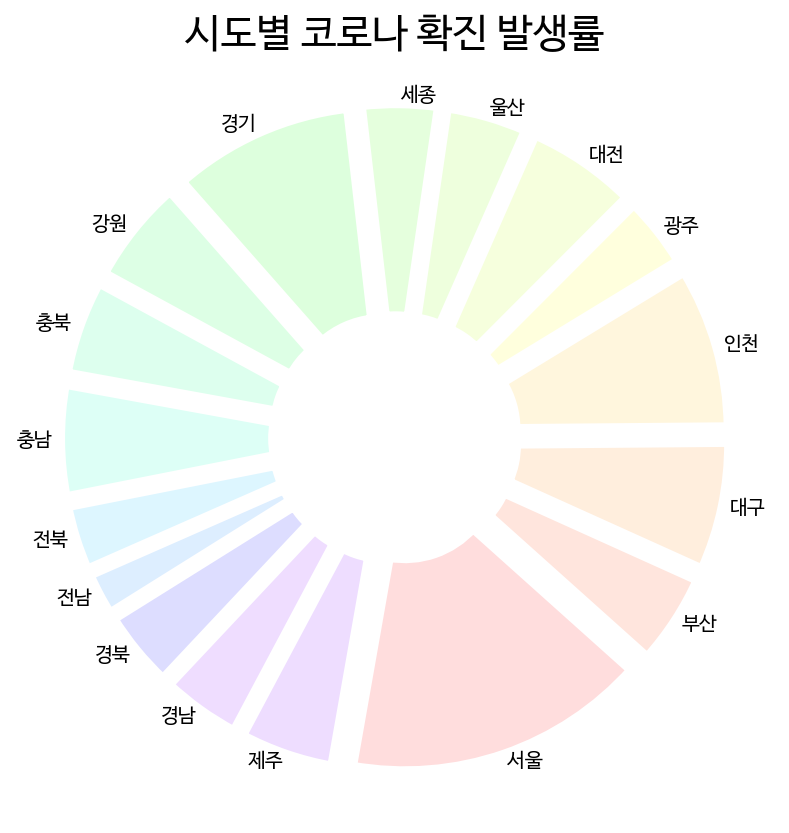

In [10]:
# 중심에서 벗어나게 하는 정도
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
# 부채꼴 스타일 지정하기
wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':5}
# 컬러 
colors= ['#ffdddd', '#ffe5dd', '#ffeedd', '#fff6dd', '#ffffdd', '#f6ffdd', '#eeffdd', '#e5ffdd', '#ddffdd', '#ddffe5', 
         '#ddffee', '#ddfff6', '#ddf6ff', '#ddeeff', '#ddddff', '#efddff', '#eeddff']

plt.figure(figsize=(7, 7))
plt.title("시도별 코로나 확진 발생률", fontsize=20)
plt.pie(df['발생률(*)'], labels=df['시도명'], labeldistance=1.025, explode=explode, wedgeprops=wedgeprops, colors=colors, startangle=260)
plt.show()

# **- 국내발생/해외유입 비교 그래프**

국내발생 확진자가 해외유입보다 압도적으로 많은 것을 수 있습니다.

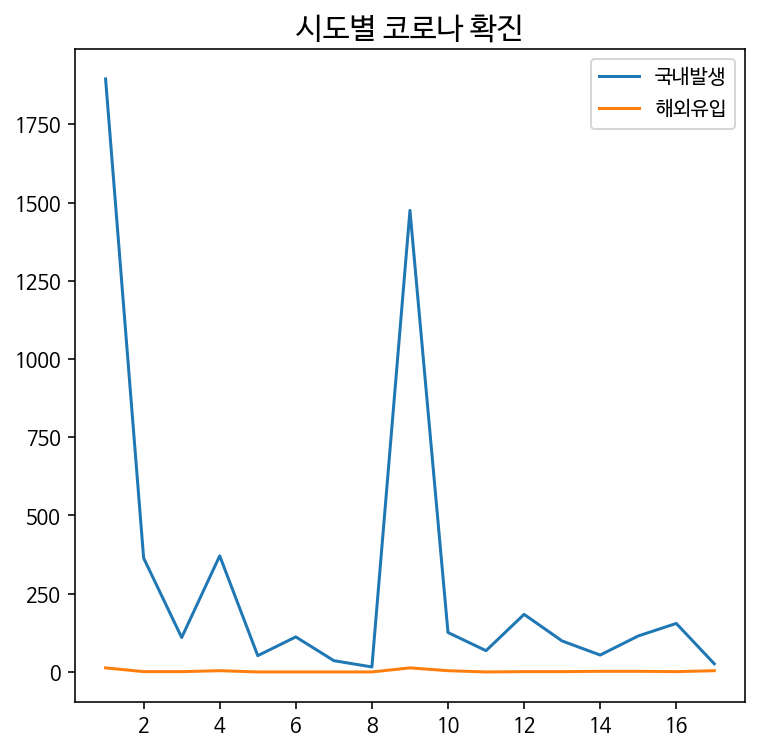

In [11]:
plt.figure(figsize=(6, 6))
plt.title("시도별 코로나 확진", fontsize=15)
plt.plot(df['국내발생'], label='국내발생')
plt.plot(df['해외유입'], label='해외유입')
plt.legend()
plt.show()

In [38]:
#국내발생 최대값
np.max(df['국내발생'])

1895

# **- 숫자특성에 의하여 각각 두변수 사이의 scatter plot 그리기**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


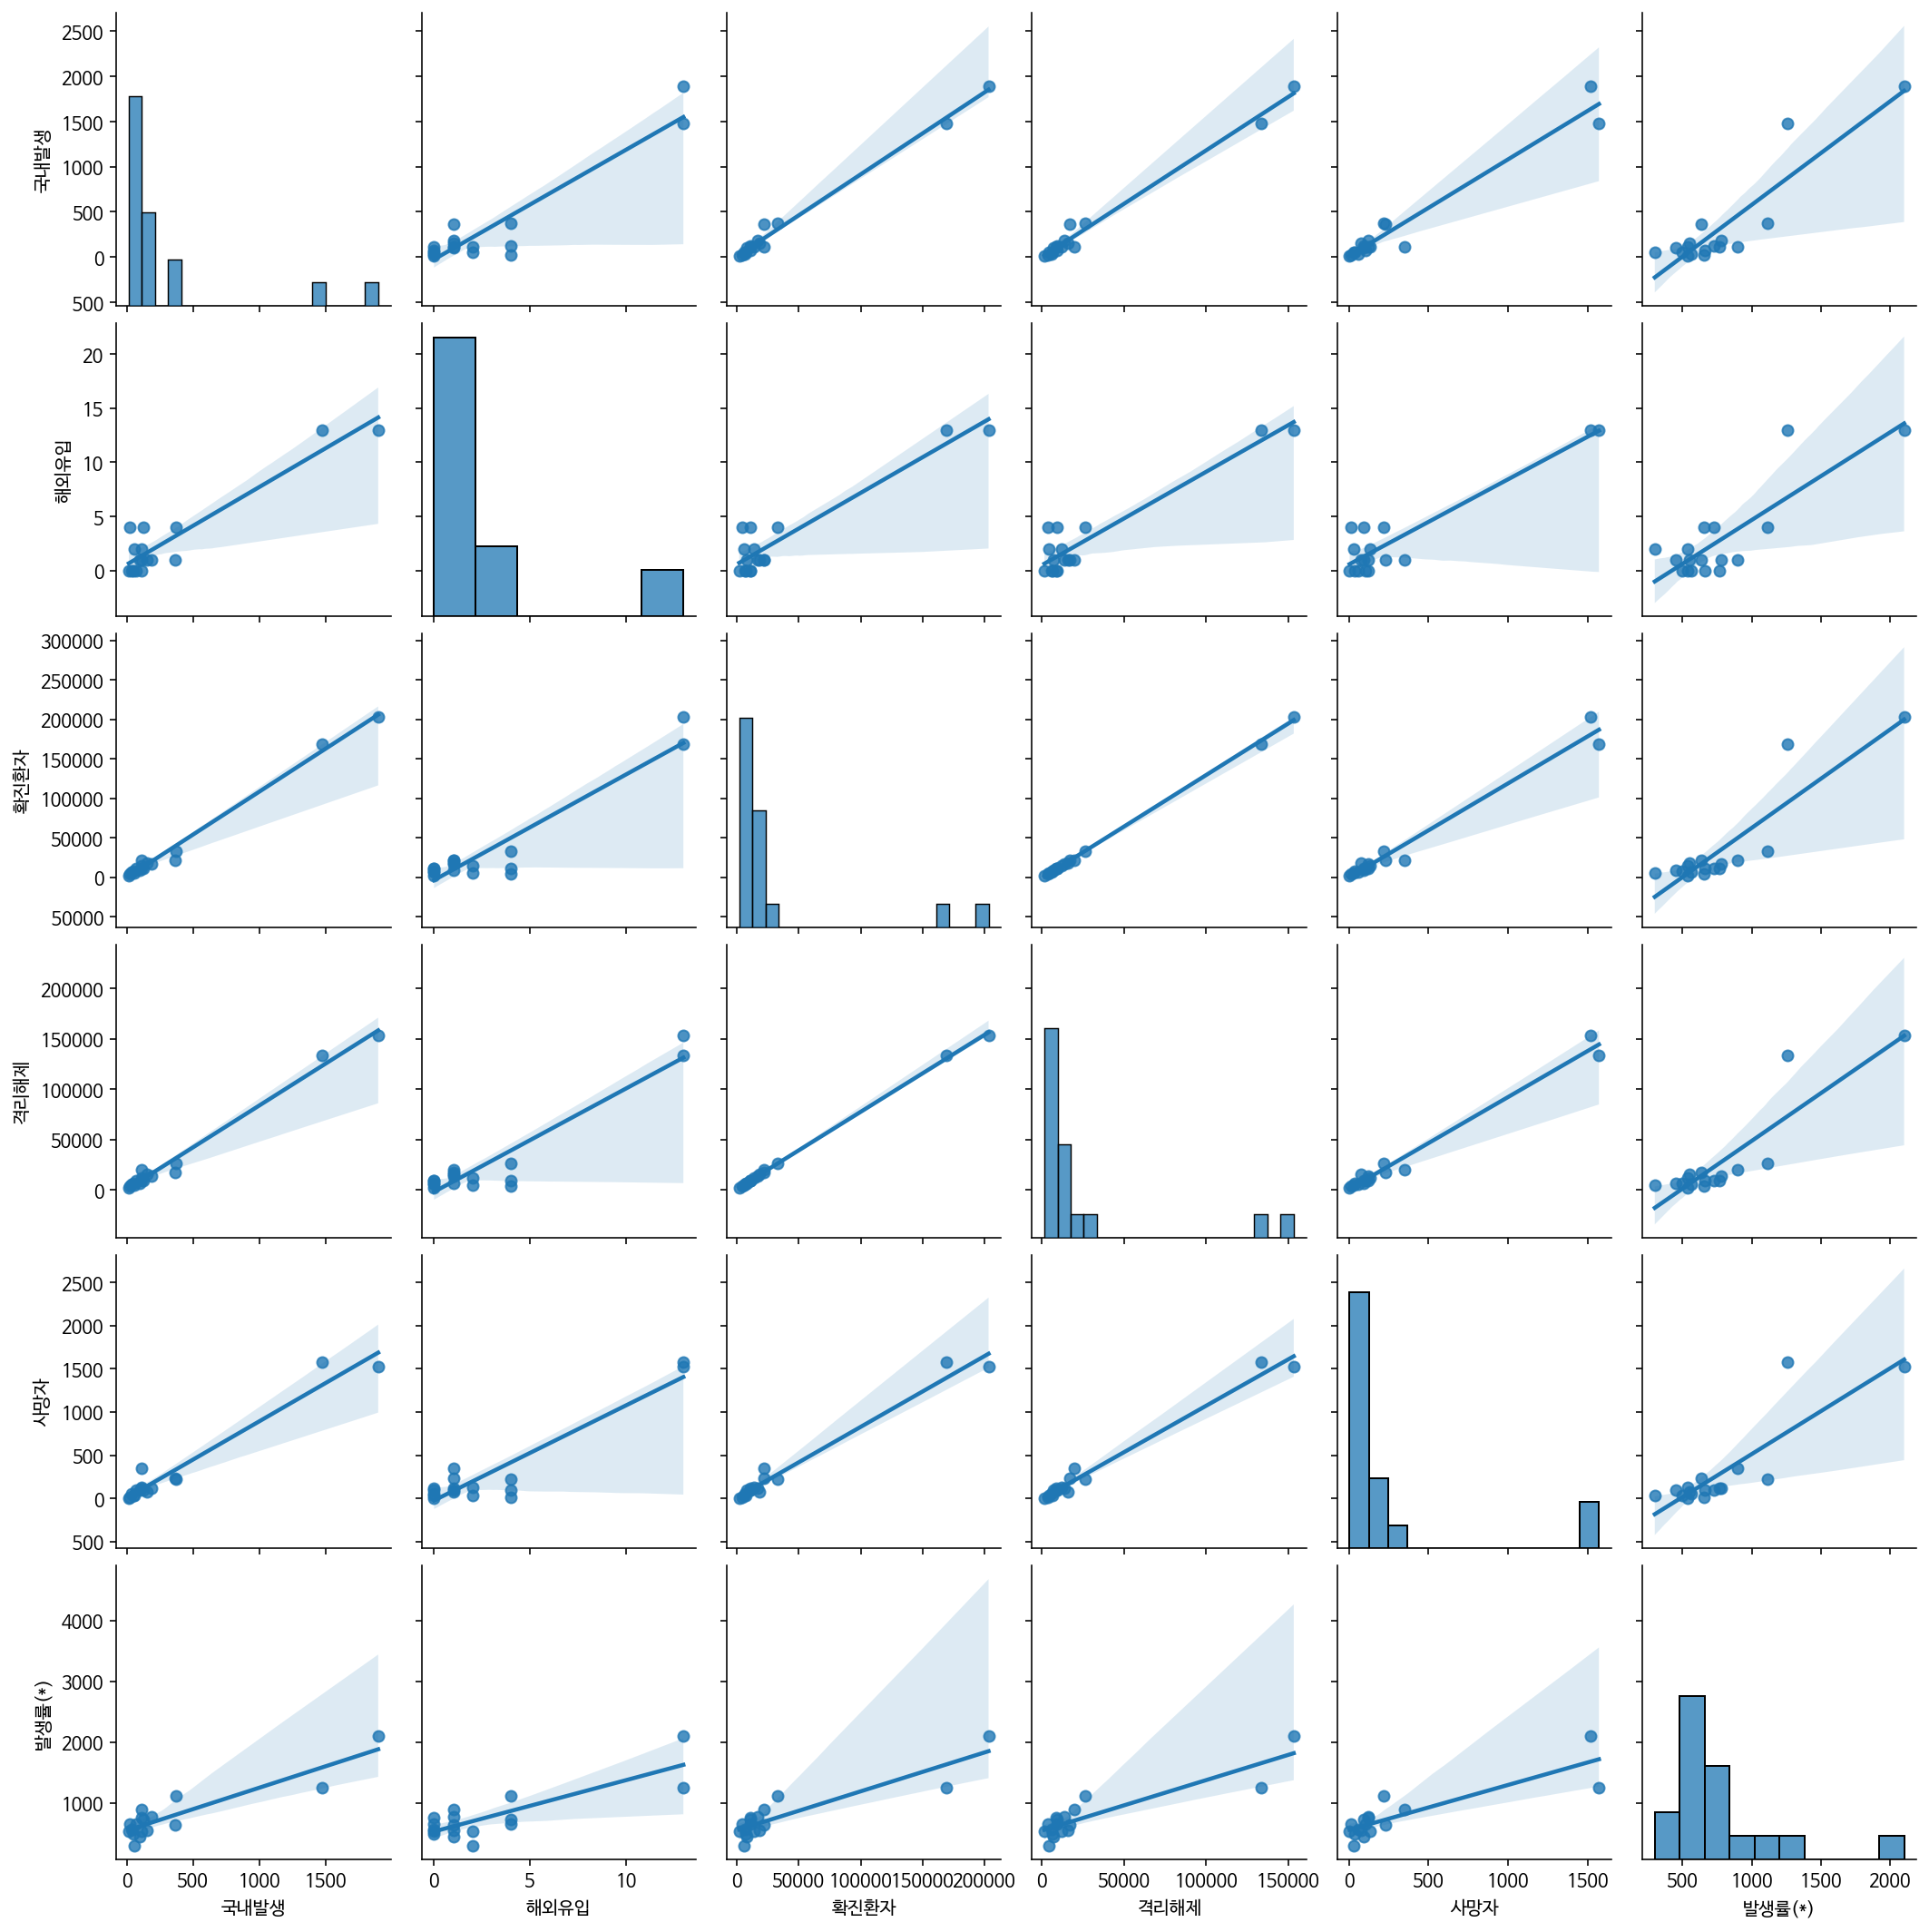

In [12]:
import seaborn as sns
sns.pairplot(df, kind='reg')

# **- 상관계수 히트맵**

In [13]:
# 상관계수 계산
df.corr()

,국내발생,해외유입,확진환자,격리해제,사망자,발생률(*)
국내발생,1.000000,0.932732,0.994425,0.992322,0.974648,0.898521
해외유입,0.932732,1.000000,0.939512,0.940567,0.929082,0.826380
확진환자,0.994425,0.939512,1.000000,0.999551,0.986882,0.892415
격리해제,0.992322,0.940567,0.999551,1.000000,0.990279,0.886725
사망자,0.974648,0.929082,0.986882,0.990279,1.000000,0.855532
발생률(*),0.898521,0.826380,0.892415,0.886725,0.855532,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

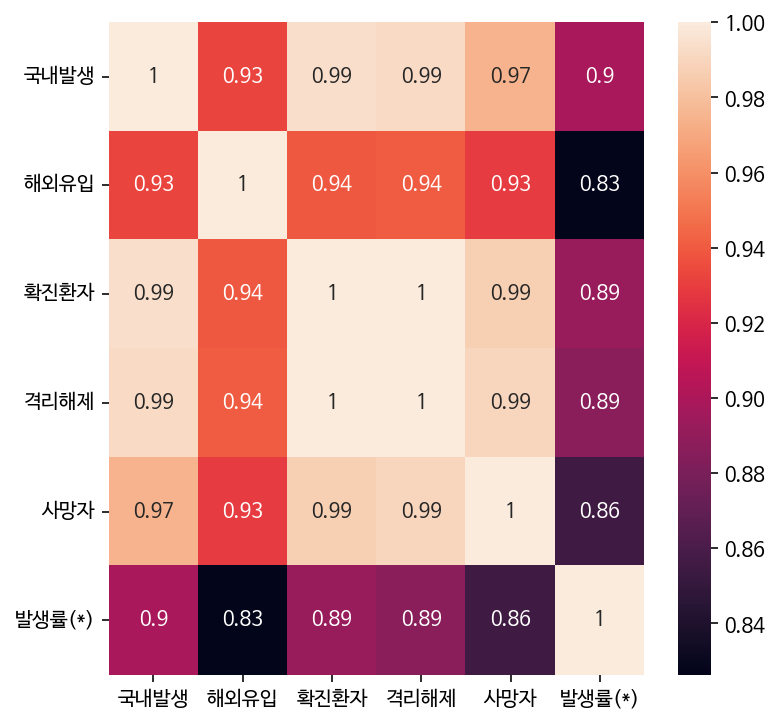

In [14]:
# 상관계수 히트맵 만들기
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True)
# y축 글자 가로로 보기 편하게 만들기
plt.yticks(rotation=0)

# **- 평균/분산/표준편차**

남은 확진환자(확진환자-격리해제-사망자)를 계산하여 이에 대해 평균/분산/표준편차를 냈습니다.

In [34]:
df1 = df['확진환자']
df2 =  df['격리해제']
df3 =  df['사망자']

# 완치되지 않은 남은 확진환자
data = df1 - df2 - df3
data

1     48246
2      4200
3      1689
4      6313
5       497
6      2156
7       521
8       219
9     33587
10     1613
11     1043
12     2607
13     1151
14      843
15     2042
16     2256
17      346
dtype: int64

In [35]:
# 평균
np.mean(data)

6431.117647058823

In [36]:
# 분산
np.var(data) 

167065729.04498273

In [37]:
# 표준편차
np.std(data)

12925.390866236221

# **끝내며**
**어려웠던 점:**  한글 텍스트를 적용하는 부분에서 어떤 코드는 적용되고, 어떤 코드는 적용이 안되어서 이 부분이 어려웠던 것 같습니다.

**아쉬웠던 점:**  다양한 차트들을 공부하고 넣어보며 좀 더 예쁘게 할 수 있었을텐데, 워드클라우드같은 다른 데이터시각화 방법으로도 더 만들어 보고 싶다. 라는 마음에 아쉬웠던 것 같습니다.


이번 학기의 데이터분석프로그래밍 수업이 끝나더라도 다른 다양한 데이터들을 활용해보고 크롤링/스크래핑 해보며 좀더 폭넓고 더 다양하게 공부해보고 싶다고 느꼈습니다.